In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pandas as pd
import plotly.express as px

In [2]:
df_sobol = pd.read_csv("../outputs/sobolIndex.csv")

<AxesSubplot:>

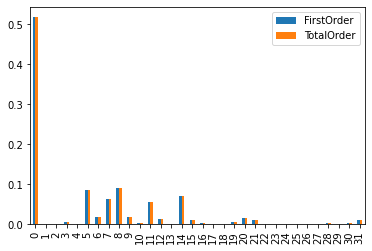

In [3]:
df_sobol.plot.bar()

we need to fit a pdf to the model

In [4]:
df_err_lars = pd.read_csv("../outputs/errLars.csv")

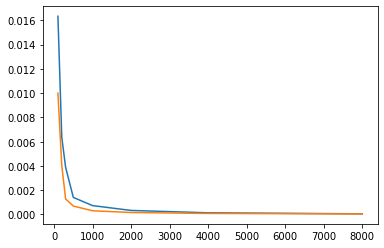

In [5]:
plt.plot(df_err_lars.iter, df_err_lars.err_val)
plt.plot(df_err_lars.iter, df_err_lars.err_loo)

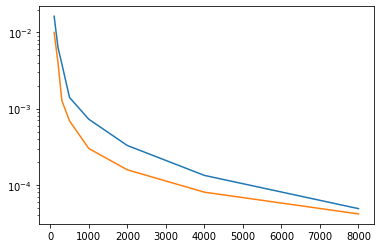

In [6]:
plt.semilogy(df_err_lars.iter, df_err_lars.err_val)
plt.semilogy(df_err_lars.iter, df_err_lars.err_loo)

In [7]:
df_err_pce = pd.read_csv("../outputs/errPCE.csv")
df_err_pce.head()

,iter,err_var_1,err_var_2,err_var_3,err_var_4,err_var_5,err_var_6,err_loo_1,err_loo_2,err_loo_3,err_loo_4,err_loo_5,err_loo_6
0,100,0.165885,0.013607,0.175187,329.636238,329.805455,442.771354,0.211694,0.013704,12.657562,inf,inf,inf
1,200,0.148588,0.006959,0.008148,194.473358,195.032073,386.272571,0.152175,0.004695,0.005194,inf,inf,inf
2,300,0.138788,0.005778,0.006272,121.079911,122.881895,324.204388,0.142626,0.003636,0.004348,inf,inf,inf
3,500,0.137076,0.005080,0.004908,46.529376,49.583016,230.597934,0.135014,0.003378,0.003541,inf,inf,inf
4,1000,0.132859,0.004617,0.004397,0.001423,0.001540,117.801932,0.132185,0.003530,0.003669,0.001418,0.001592,inf


In [37]:
px.line(
    df_err_pce,
    x="iter",
    y=df_err_pce.columns.drop("iter"),
    # range_y=[0, 0.1],
    range_y=[1e-5,1e-1],
    log_y=True,
)

(1e-05, 0.1)

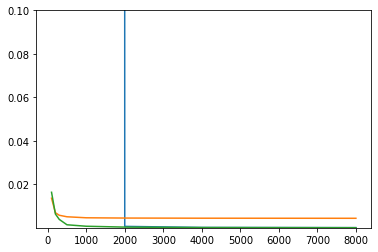

In [14]:
plt.plot(df_err_pce.iter, df_err_pce.err_var_6)
plt.plot(df_err_pce.iter, df_err_pce.err_var_2)
plt.plot(df_err_lars.iter, df_err_lars.err_val)
plt.ylim([1e-5,1e-1])

(1e-05, 0.1)

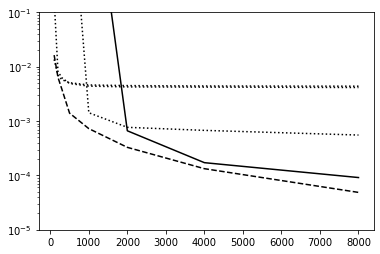

In [38]:
plt.semilogy(df_err_pce.iter, df_err_pce.err_var_6,'k-')
plt.semilogy(df_err_pce.iter, df_err_pce.err_var_4,'k:')
plt.semilogy(df_err_pce.iter, df_err_pce.err_var_3,'k:')
plt.semilogy(df_err_pce.iter, df_err_pce.err_var_2,'k:')
plt.semilogy(df_err_lars.iter, df_err_lars.err_val,'k--')
plt.ylim([1e-5,1e-1])

稀疏pce方法在只有少量数据的情况下可以获得明显更高的精度。相对而言，对于本文研究的问题，当训练数据超过4000组的时候，传统pce方法也可以获得不错的精度。

In [27]:
df_r2_pce = pd.read_csv('../outputs/r2PCE.csv')
df_r2_lars = pd.read_csv('../outputs/r2Lars.csv')

In [18]:
px.scatter(df_r2_pce,x='eval',y=['order_1','order_2','order_3','order_4'])

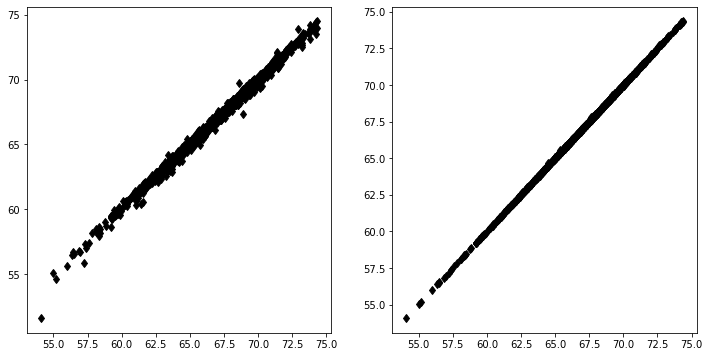

In [34]:
# plt.figure(
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_r2_pce['eval'],df_r2_pce.order_3,'kd')
plt.subplot(1,2,2)
# plt.plot(df_r2_pce['eval'],df_r2_pce.order_4,'kd')
plt.plot(df_r2_lars.Yval,df_r2_lars.YLARS,'kd')
# df_r2_pce

In [28]:
df_r2_lars

,YLARS,Yval
0,62.838067,62.842819
1,67.405543,67.423054
2,60.894610,60.887252
3,70.073839,70.081437
4,69.790828,69.795021
...,...,...
1996,63.380479,63.354285
1997,72.120565,72.126260
1998,66.671533,66.661116
1999,66.151808,66.143868
